In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve,plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings 
filterwarnings("ignore")

In [73]:
survey_df_train=pd.read_csv('Surveydata_train.csv')
survey_df_test=pd.read_csv('Surveydata_test.csv')
display(survey_df_train.head())
display(survey_df_test.head())

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [74]:
display(survey_df_train.info())
display(survey_df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_time_convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_location        94349 non-null  object
 7   Onboardwifi_service      94349 non-null  object
 8   Onboard_entertainment    94361 non-null  object
 9   Online_support           94288 non-null  object
 10  Onlinebooking_Ease       94306 non-null  object
 11  Onboard_service          86778 non-null  object
 12  Leg_room                 94289 non-null  object
 13  Baggage_handling         94237 non-null  object
 14  Checkin_service          94302 non-nul

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_time_convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_location        35590 non-null  object
 6   Onboardwifi_service      35590 non-null  object
 7   Onboard_entertainment    35594 non-null  object
 8   Online_support           35576 non-null  object
 9   Onlinebooking_Ease       35584 non-null  object
 10  Onboard_service          32730 non-null  object
 11  Leg_room                 35577 non-null  object
 12  Baggage_handling         35562 non-null  object
 13  Checkin_service          35580 non-null  object
 14  Cleanliness              35600 non-nul

None

In [75]:
display(survey_df_train.shape)
display(survey_df_test.shape)

(94379, 17)

(35602, 16)

In [76]:
display(survey_df_train.iloc[:,2:17].describe(include = 'all'))
display(survey_df_test.iloc[:,1:16].describe(include = 'all'))

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
count,94318,94379,85449,85638,94349,94349,94361,94288,94306,86778,94289,94237,94302,94373,94373
unique,6,2,6,6,6,6,6,6,6,6,6,5,6,6,6
top,acceptable,Green Car,good,acceptable,manageable,good,good,good,good,good,good,good,good,good,good
freq,21158,47435,19574,18468,24173,22835,30446,30016,28909,27265,28870,34944,26502,35427,25533


,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
count,35580,35602,32277,32245,35590,35590,35594,35576,35584,32730,35577,35562,35580,35600,35600
unique,6,2,6,6,5,6,6,5,6,5,6,5,5,5,6
top,acceptable,Ordinary,good,acceptable,manageable,good,good,good,good,good,good,good,good,good,good
freq,8003,17860,7361,7133,9364,8743,11436,11487,11025,10222,10842,13291,9982,13421,9680


In [77]:
display(survey_df_train.isna().sum())
display(survey_df_test.isna().sum())

ID                            0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

ID                            0
Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
dtype: int64

In [78]:
travel_df_train = pd.read_csv("Traveldata_train.csv")
display(travel_df_train.head())
travel_df_test = pd.read_csv("Traveldata_test.csv")
display(travel_df_test.head())

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


In [79]:
display(travel_df_train.info())
display(travel_df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94302 non-null  object 
 2   CustomerType            85428 non-null  object 
 3   Age                     94346 non-null  float64
 4   TypeTravel              85153 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94322 non-null  float64
 8   ArrivalDelay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      35602 non-null  int64  
 1   Gender                  35572 non-null  object 
 2   CustomerType            32219 non-null  object 
 3   Age                     35591 non-null  float64
 4   TypeTravel              32154 non-null  object 
 5   Travel_Class            35602 non-null  object 
 6   Travel_Distance         35602 non-null  int64  
 7   DepartureDelay_in_Mins  35573 non-null  float64
 8   ArrivalDelay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


None

In [80]:
display(travel_df_train.shape)
display(travel_df_test.shape)

(94379, 9)

(35602, 9)

In [81]:
display(travel_df_train.iloc[:,1:9].describe(include ='all'))
display(travel_df_test.iloc[:,1:9].describe(include ='all'))

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,94302,85428,94346.000000,85153,94379,94379.000000,94322.000000,94022.000000
unique,2,2,NaN,2,2,NaN,NaN,NaN
top,Female,Loyal Customer,NaN,Business travel,Eco,NaN,NaN,NaN
freq,47815,69823,NaN,58617,49342,NaN,NaN,NaN
mean,NaN,NaN,39.419647,NaN,NaN,1978.888185,14.647092,15.005222
std,NaN,NaN,15.116632,NaN,NaN,1027.961019,38.138781,38.439409
min,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000
25%,NaN,NaN,27.000000,NaN,NaN,1359.000000,0.000000,0.000000
50%,NaN,NaN,40.000000,NaN,NaN,1923.000000,0.000000,0.000000
75%,NaN,NaN,51.000000,NaN,NaN,2538.000000,12.000000,13.000000


,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,35572,32219,35591.000000,32154,35602,35602.000000,35573.000000,35479.000000
unique,2,2,NaN,2,2,NaN,NaN,NaN
top,Female,Loyal Customer,NaN,Business travel,Eco,NaN,NaN,NaN
freq,18069,26349,NaN,22313,18473,NaN,NaN,NaN
mean,NaN,NaN,39.446995,NaN,NaN,1987.151761,14.880696,15.308802
std,NaN,NaN,15.137554,NaN,NaN,1024.308863,37.895453,38.531293
min,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000
25%,NaN,NaN,27.000000,NaN,NaN,1360.000000,0.000000,0.000000
50%,NaN,NaN,40.000000,NaN,NaN,1929.000000,0.000000,0.000000
75%,NaN,NaN,51.000000,NaN,NaN,2559.000000,13.000000,13.000000


In [82]:
display(travel_df_train.isna().sum())
display(travel_df_test.isna().sum())

ID                           0
Gender                      77
CustomerType              8951
Age                         33
TypeTravel                9226
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      57
ArrivalDelay_in_Mins       357
dtype: int64

ID                           0
Gender                      30
CustomerType              3383
Age                         11
TypeTravel                3448
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      29
ArrivalDelay_in_Mins       123
dtype: int64

In [83]:
display(survey_df_train.duplicated().sum())
display(survey_df_test.duplicated().sum())
display(travel_df_train.duplicated().sum())
display(travel_df_test.duplicated().sum())

0

0

0

0

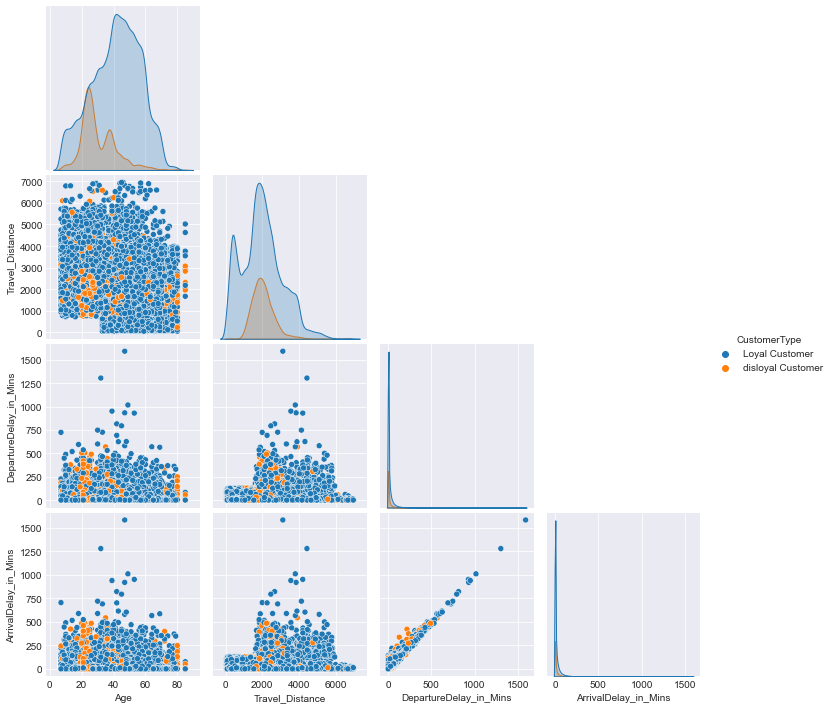

In [84]:
sns.pairplot(travel_df_train.iloc[:,1:9],corner=True,hue='CustomerType');

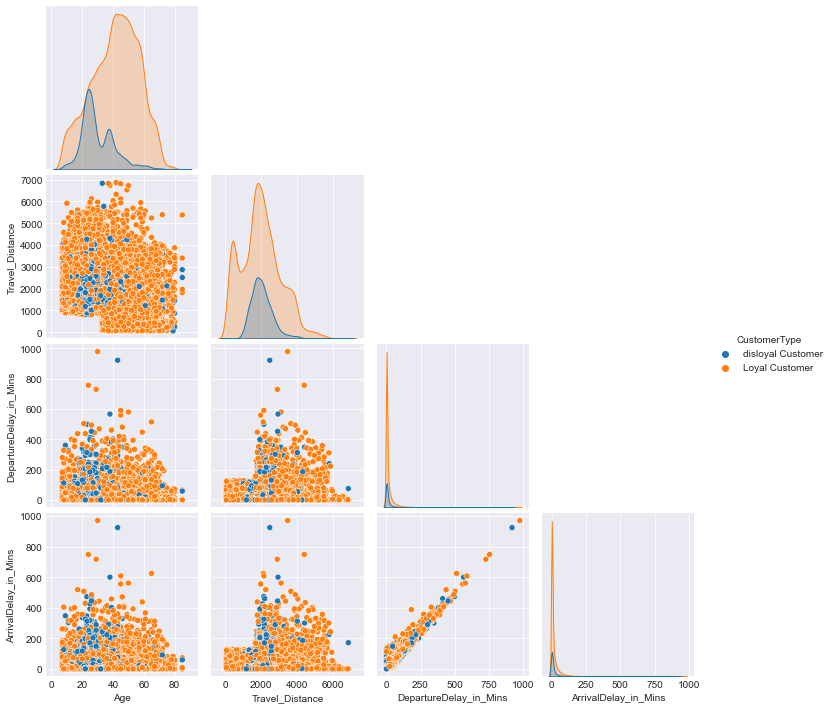

In [85]:
sns.pairplot(travel_df_test.iloc[:,1:9],corner=True,hue='CustomerType');

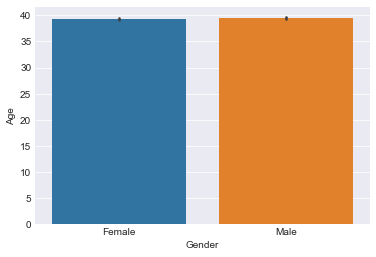

In [86]:
sns.barplot(x='Gender',y='Age',data=travel_df_train);

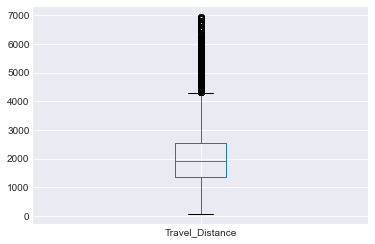

In [87]:
travel_df_train.boxplot('Travel_Distance');

In [88]:
df_train=pd.merge(survey_df_train,travel_df_train,on='ID')
df_test=pd.merge(survey_df_test,travel_df_test,on='ID')
display(df_train.head())
display(df_test.head())

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,...,need improvement,poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,...,good,good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,...,excellent,excellent,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,...,acceptable,acceptable,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,...,good,good,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,...,excellent,poor,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,...,excellent,acceptable,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,...,need improvement,excellent,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,...,excellent,poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,...,excellent,excellent,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


In [89]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_location        94349 non-null  object 
 7   Onboardwifi_service      94349 non-null  object 
 8   Onboard_entertainment    94361 non-null  object 
 9   Online_support           94288 non-null  object 
 10  Onlinebooking_Ease       94306 non-null  object 
 11  Onboard_service          86778 non-null  object 
 12  Leg_room                 94289 non-null  object 
 13  Baggage_handling         94237 non-null  object 
 14  Checkin_service       

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_time_convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_location        35590 non-null  object 
 6   Onboardwifi_service      35590 non-null  object 
 7   Onboard_entertainment    35594 non-null  object 
 8   Online_support           35576 non-null  object 
 9   Onlinebooking_Ease       35584 non-null  object 
 10  Onboard_service          32730 non-null  object 
 11  Leg_room                 35577 non-null  object 
 12  Baggage_handling         35562 non-null  object 
 13  Checkin_service          35580 non-null  object 
 14  Cleanliness           

None

In [90]:
display(df_train.shape)
display(df_test.shape)

(94379, 25)

(35602, 24)

In [91]:
display(df_train.duplicated().sum())
display(df_test.duplicated().sum())

0

0

In [92]:
display(df_train[df_train['Seat_comfort'].isna()])
display(df_train.groupby(['Seat_Class','Seat_comfort']).count()['ID'])
display(df_test.groupby(['Seat_Class','Seat_comfort']).count()['ID'])


,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
560,98800561,0,NaN,Green Car,NaN,good,need improvement,good,good,good,...,acceptable,good,Male,Loyal Customer,30.0,Business travel,Eco,1495,0.0,0.0
2214,98802215,1,NaN,Green Car,NaN,poor,manageable,good,good,good,...,excellent,good,Male,Loyal Customer,30.0,NaN,Business,4725,86.0,77.0
4754,98804755,0,NaN,Ordinary,NaN,need improvement,manageable,excellent,need improvement,poor,...,good,excellent,Male,Loyal Customer,63.0,Personal Travel,Eco,1380,0.0,0.0
5191,98805192,1,NaN,Green Car,NaN,acceptable,manageable,good,good,good,...,acceptable,good,Male,NaN,33.0,Business travel,Business,1436,6.0,25.0
8809,98808810,1,NaN,Green Car,NaN,acceptable,manageable,good,good,good,...,need improvement,good,Female,Loyal Customer,12.0,Personal Travel,Eco,3114,41.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86883,98886884,0,NaN,Green Car,NaN,acceptable,manageable,need improvement,acceptable,need improvement,...,good,need improvement,Male,Loyal Customer,13.0,Personal Travel,Eco,2188,4.0,0.0
87693,98887694,0,NaN,Green Car,NaN,excellent,very convinient,need improvement,need improvement,need improvement,...,acceptable,need improvement,Female,Loyal Customer,40.0,Business travel,Eco,2361,0.0,0.0
88765,98888766,0,NaN,Green Car,NaN,acceptable,Convinient,need improvement,acceptable,poor,...,acceptable,need improvement,Female,disloyal Customer,49.0,Business travel,Eco,1788,22.0,18.0
90800,98890801,0,NaN,Ordinary,NaN,excellent,need improvement,acceptable,acceptable,acceptable,...,good,acceptable,Male,Loyal Customer,37.0,Business travel,Eco,1528,76.0,56.0


Seat_Class  Seat_comfort    
Green Car   acceptable          10604
            excellent            6597
            extremely poor       1733
            good                10395
            need improvement    10513
            poor                 7563
Ordinary    acceptable          10554
            excellent            6374
            extremely poor       1730
            good                10200
            need improvement    10433
            poor                 7622
Name: ID, dtype: int64

Seat_Class  Seat_comfort    
Green Car   acceptable          3957
            excellent           2367
            extremely poor       648
            good                3920
            need improvement    3942
            poor                2896
Ordinary    acceptable          4046
            excellent           2487
            extremely poor       681
            good                3888
            need improvement    3889
            poor                2859
Name: ID, dtype: int64

Seat_comfort is a related field to Seat_Class, both types in Seat_Class has higest frequency for 'acceptable' so we are imputing acceptable for Nan

In [93]:
df_train['Seat_comfort'].fillna('acceptable',inplace=True)
df_train['Seat_comfort'].isna().sum()

0

In [94]:
df_test['Seat_comfort'].fillna('acceptable',inplace=True)
df_test['Seat_comfort'].isna().sum()

0

In [95]:
display(df_train.groupby('Arrival_time_convenient').mean()['ArrivalDelay_in_Mins'])
display(df_train[df_train.Arrival_time_convenient.isna()]['ArrivalDelay_in_Mins'])
display(df_train['Arrival_time_convenient'].value_counts())

Arrival_time_convenient
acceptable          15.283059
excellent           14.551372
extremely poor      12.960593
good                15.046130
need improvement    15.595622
poor                15.340761
Name: ArrivalDelay_in_Mins, dtype: float64

7         3.0
12        0.0
16        1.0
29        0.0
33       30.0
         ... 
94318    23.0
94322    58.0
94329     8.0
94345     0.0
94377     0.0
Name: ArrivalDelay_in_Mins, Length: 8930, dtype: float64

good                19574
excellent           17684
acceptable          15177
need improvement    14990
poor                13692
extremely poor       4332
Name: Arrival_time_convenient, dtype: int64

In [96]:
display(df_test.groupby('Arrival_time_convenient').mean()['ArrivalDelay_in_Mins'])
display(df_test[df_test['Arrival_time_convenient'].isna()]['ArrivalDelay_in_Mins'])

display(df_test['Arrival_time_convenient'].value_counts())

Arrival_time_convenient
acceptable          15.711809
excellent           15.702209
extremely poor      12.568510
good                15.440278
need improvement    15.620385
poor                14.699961
Name: ArrivalDelay_in_Mins, dtype: float64

5        72.0
11        0.0
13        0.0
28        0.0
35        1.0
         ... 
35564    19.0
35566     0.0
35579     0.0
35588     0.0
35593     9.0
Name: ArrivalDelay_in_Mins, Length: 3325, dtype: float64

good                7361
excellent           6589
acceptable          5844
need improvement    5684
poor                5131
extremely poor      1668
Name: Arrival_time_convenient, dtype: int64

Comparing Arrival_time_convinient variable with ArivalDelay_in_Min. The mean of ArivalDelay_in_Min remains same in most categories accept for 'extremely poor', cannot get much information out of it, So we impute most frequent class i.e good for Nan in Arrival_time_convinient

In [97]:
df_train['Arrival_time_convenient'].fillna('good', inplace = True)
display(df_train['Arrival_time_convenient'].isna().sum()) #imputing 'good' value for 'NaN'

df_test['Arrival_time_convenient'].fillna('good', inplace = True)
display(df_test['Arrival_time_convenient'].isna().sum())

0

0

In [98]:
for i in range(5,19):
    df_train.iloc[:,i].fillna(df_train.iloc[:,i].value_counts().index[0],inplace=True)

In [99]:
for i in range(4,18):
    df_test.iloc[:,i].fillna(df_train.iloc[:,i].value_counts().index[0],inplace=True)

In [100]:
df_train.isna().sum()

ID                            0
Overall_Experience            0
Seat_comfort                  0
Seat_Class                    0
Arrival_time_convenient       0
Catering                      0
Platform_location             0
Onboardwifi_service           0
Onboard_entertainment         0
Online_support                0
Onlinebooking_Ease            0
Onboard_service               0
Leg_room                      0
Baggage_handling              0
Checkin_service               0
Cleanliness                   0
Online_boarding               0
Gender                        0
CustomerType                  0
Age                          33
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
dtype: int64

In [101]:
df_test.isna().sum()

ID                            0
Seat_comfort                  0
Seat_Class                    0
Arrival_time_convenient       0
Catering                      0
Platform_location             0
Onboardwifi_service           0
Onboard_entertainment         0
Online_support                0
Onlinebooking_Ease            0
Onboard_service               0
Leg_room                      0
Baggage_handling              0
Checkin_service               0
Cleanliness                   0
Online_boarding               0
Gender                        0
CustomerType                  0
Age                          11
TypeTravel                 3448
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       29
ArrivalDelay_in_Mins        123
dtype: int64

In [102]:
df_train.Age=pd.cut(df_train.Age,5,labels=['25','35','45','60','80'])
df_test.Age=pd.cut(df_test.Age,5,labels=['25','35','45','60','80'])
display('Age',df_train.Age.unique())
display('Age',df_test.Age.unique())

'Age'

['45', '60', '25', '35', '80', NaN]
Categories (5, object): ['25' < '35' < '45' < '60' < '80']

'Age'

['35', '25', '60', '45', '80', NaN]
Categories (5, object): ['25' < '35' < '45' < '60' < '80']

In [103]:
np.where(df_train['CustomerType'] == 'Loyal Customer',df_train['Age'],df_train['Age'].fillna('60', inplace = True))
np.where(df_train['CustomerType'] == 'disloyal Customer',df_train['Age'],df_train['Age'].fillna('25', inplace = True))
np.where(df_test['CustomerType'] == 'Loyal Customer',df_test['Age'],df_test['Age'].fillna('60', inplace = True))
np.where(df_test['CustomerType'] == 'disloyal Customer',df_test['Age'],df_test['Age'].fillna('25', inplace = True))

array([None, '25', None, ..., '25', None, None], dtype=object)

In [104]:
df_train.isna().sum()

ID                            0
Overall_Experience            0
Seat_comfort                  0
Seat_Class                    0
Arrival_time_convenient       0
Catering                      0
Platform_location             0
Onboardwifi_service           0
Onboard_entertainment         0
Online_support                0
Onlinebooking_Ease            0
Onboard_service               0
Leg_room                      0
Baggage_handling              0
Checkin_service               0
Cleanliness                   0
Online_boarding               0
Gender                        0
CustomerType                  0
Age                           0
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
dtype: int64

In [105]:
df_test.isna().sum()

ID                            0
Seat_comfort                  0
Seat_Class                    0
Arrival_time_convenient       0
Catering                      0
Platform_location             0
Onboardwifi_service           0
Onboard_entertainment         0
Online_support                0
Onlinebooking_Ease            0
Onboard_service               0
Leg_room                      0
Baggage_handling              0
Checkin_service               0
Cleanliness                   0
Online_boarding               0
Gender                        0
CustomerType                  0
Age                           0
TypeTravel                 3448
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       29
ArrivalDelay_in_Mins        123
dtype: int64

In [106]:
df_train.groupby(['Travel_Class','TypeTravel']).count()['ID']

Travel_Class  TypeTravel     
Business      Business travel    38849
              Personal Travel     1791
Eco           Business travel    19768
              Personal Travel    24745
Name: ID, dtype: int64

In [107]:
df_train[df_train.TypeTravel.isna()]['Travel_Class']

0        Business
12       Business
15       Business
30            Eco
39            Eco
           ...   
94273         Eco
94288         Eco
94307    Business
94328         Eco
94378         Eco
Name: Travel_Class, Length: 9226, dtype: object

In [108]:
np.where(df_train['Travel_Class'] == 'Business', df_train['TypeTravel'],df_train['TypeTravel'].fillna('Business travel', inplace = True))
np.where(df_train['Travel_Class'] == 'Eco',df_train['TypeTravel'],df_train['TypeTravel'].fillna('Personal Travel', inplace = True))

np.where(df_test['Travel_Class'] == 'Business',df_test['TypeTravel'],df_test['TypeTravel'].fillna('Business travel', inplace = True))
np.where(df_test['Travel_Class'] == 'Eco',df_test['TypeTravel'],df_test['TypeTravel'].fillna('Personal Travel', inplace = True))

array([None, None, None, ..., 'Business travel', 'Personal Travel',
       'Personal Travel'], dtype=object)

In [109]:
df_train['DepartureDelay_in_Mins'].fillna(df_train['DepartureDelay_in_Mins'].mean(), inplace = True)
df_train['ArrivalDelay_in_Mins'].fillna(df_train['ArrivalDelay_in_Mins'].mean(), inplace = True)


df_test['DepartureDelay_in_Mins'].fillna(df_test['DepartureDelay_in_Mins'].mean(), inplace = True)
df_test['ArrivalDelay_in_Mins'].fillna(df_test['ArrivalDelay_in_Mins'].mean(), inplace = True)

In [110]:
display(df_train.isna().sum())
display(df_test.isna().sum())

ID                         0
Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
dtype: int64

ID                         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
dtype: int64

In [111]:
df_train['Seat_comfort'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Arrival_time_convenient'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Catering'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Onboardwifi_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Onboard_entertainment'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Online_support'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Onlinebooking_Ease'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Onboard_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Leg_room'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Checkin_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Cleanliness'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Online_boarding'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)

In [112]:
df_test.Onboardwifi_service.unique()

array(['need improvement', 'acceptable', 'excellent', 'poor', 'good',
       'extremely poor', 'manageable'], dtype=object)

In [113]:
df_test['Onboardwifi_service'].replace(['manageable' ], ['acceptable'], inplace = True)

In [114]:
df_test['Seat_comfort'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Arrival_time_convenient'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Catering'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Onboardwifi_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Onboard_entertainment'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Online_support'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Onlinebooking_Ease'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Onboard_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Leg_room'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Checkin_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Cleanliness'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Online_boarding'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)

In [115]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Overall_Experience       94379 non-null  int64   
 2   Seat_comfort             94379 non-null  int64   
 3   Seat_Class               94379 non-null  object  
 4   Arrival_time_convenient  94379 non-null  int64   
 5   Catering                 94379 non-null  int64   
 6   Platform_location        94379 non-null  object  
 7   Onboardwifi_service      94379 non-null  int64   
 8   Onboard_entertainment    94379 non-null  int64   
 9   Online_support           94379 non-null  int64   
 10  Onlinebooking_Ease       94379 non-null  int64   
 11  Onboard_service          94379 non-null  int64   
 12  Leg_room                 94379 non-null  int64   
 13  Baggage_handling         94379 non-null  object  
 14  Checki

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       35602 non-null  int64   
 1   Seat_comfort             35602 non-null  int64   
 2   Seat_Class               35602 non-null  object  
 3   Arrival_time_convenient  35602 non-null  int64   
 4   Catering                 35602 non-null  int64   
 5   Platform_location        35602 non-null  object  
 6   Onboardwifi_service      35602 non-null  int64   
 7   Onboard_entertainment    35602 non-null  int64   
 8   Online_support           35602 non-null  int64   
 9   Onlinebooking_Ease       35602 non-null  int64   
 10  Onboard_service          35602 non-null  int64   
 11  Leg_room                 35602 non-null  int64   
 12  Baggage_handling         35602 non-null  object  
 13  Checkin_service          35602 non-null  int64   
 14  Cleanl

None

In [116]:
df_test.Platform_location.unique()

array(['manageable', 'very convinient', 'need improvement',
       'Inconvinient', 'Convinient', 'acceptable'], dtype=object)

In [117]:
df_test['Platform_location'].replace(['acceptable'], ['very inconvinient'], inplace = True)

In [118]:
df_test.Gender.unique()

array(['Female', 'Male', 'good'], dtype=object)

In [119]:
df_test.Gender.value_counts()

Female    18069
Male      17503
good         30
Name: Gender, dtype: int64

In [120]:
df_test['Gender'].replace(['good'], ['Female'], inplace = True)

In [121]:
df_test.CustomerType.value_counts()

Loyal Customer       26349
disloyal Customer     5870
Female                3383
Name: CustomerType, dtype: int64

In [122]:
df_test['CustomerType'].replace(['Female'], ['Loyal Customer'], inplace = True)

In [123]:
df_train['Platform_location'].replace(['very convinient', 'need improvement', 'manageable',
       'Inconvinient', 'Convinient', 'very inconvinient'], [5,2,3,1,4,0], inplace = True)
df_train['Seat_Class'].replace(['Green Car', 'Ordinary'], [1,0], inplace = True)
df_train['Baggage_handling'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Platform_location'].replace(['very convinient', 'need improvement', 'manageable',
       'Inconvinient', 'Convinient', 'very inconvinient'], [5,2,3,1,4,0], inplace = True)
df_test['Seat_Class'].replace(['Green Car', 'Ordinary'], [1,0], inplace = True)
df_test['Baggage_handling'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Gender'].replace(['Female', 'Male'], [0,1], inplace = True)
df_train['CustomerType'].replace(['Loyal Customer', 'disloyal Customer'], [1,0], inplace = True)
df_train['TypeTravel'].replace(['Business travel', 'Personal Travel'], [0,1], inplace = True)
df_train['Travel_Class'].replace(['Business', 'Eco'], [0,1], inplace = True)
df_test['Gender'].replace(['Female', 'Male'], [0,1], inplace = True)
df_test['CustomerType'].replace(['Loyal Customer', 'disloyal Customer'], [1,0], inplace = True)
df_test['TypeTravel'].replace(['Business travel', 'Personal Travel'], [0,1], inplace = True)
df_test['Travel_Class'].replace(['Business', 'Eco'], [0,1], inplace = True)

In [124]:
for feature in df_train.columns:
    if df_train[feature].dtype == 'object':
        df_train[feature] = pd.Categorical(df_train[feature])
        
df_train = pd.get_dummies(df_train, columns = ['Age'])

In [125]:
for feature in df_test.columns:
    if df_test[feature].dtype == 'object':
        df_test[feature] = pd.Categorical(df_test[feature])
        
df_test = pd.get_dummies(df_test, columns = ['Age'])

In [126]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94379 non-null  int64  
 3   Seat_Class               94379 non-null  int64  
 4   Arrival_time_convenient  94379 non-null  int64  
 5   Catering                 94379 non-null  int64  
 6   Platform_location        94379 non-null  int64  
 7   Onboardwifi_service      94379 non-null  int64  
 8   Onboard_entertainment    94379 non-null  int64  
 9   Online_support           94379 non-null  int64  
 10  Onlinebooking_Ease       94379 non-null  int64  
 11  Onboard_service          94379 non-null  int64  
 12  Leg_room                 94379 non-null  int64  
 13  Baggage_handling         94379 non-null  int64  
 14  Checkin_service       

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_comfort             35602 non-null  int64  
 2   Seat_Class               35602 non-null  int64  
 3   Arrival_time_convenient  35602 non-null  int64  
 4   Catering                 35602 non-null  int64  
 5   Platform_location        35602 non-null  int64  
 6   Onboardwifi_service      35602 non-null  int64  
 7   Onboard_entertainment    35602 non-null  int64  
 8   Online_support           35602 non-null  int64  
 9   Onlinebooking_Ease       35602 non-null  int64  
 10  Onboard_service          35602 non-null  int64  
 11  Leg_room                 35602 non-null  int64  
 12  Baggage_handling         35602 non-null  int64  
 13  Checkin_service          35602 non-null  int64  
 14  Cleanliness           

None

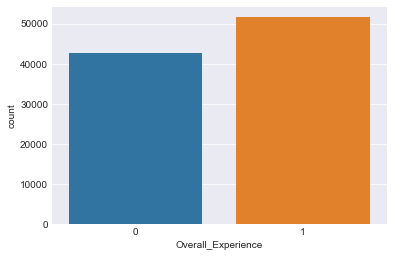

In [127]:
sns.countplot('Overall_Experience',data =df_train);

In [128]:
#seperating the independant and dependant variables
x =df_train.drop(['ID', 'Overall_Experience'], axis = 1)
y =df_train['Overall_Experience']
display(x.head())

x_test =df_test.drop(['ID',], axis = 1)
display(x_test.head())

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Age_25,Age_35,Age_45,Age_60,Age_80
0,2,1,5,5,5,4,2,3,2,2,...,0,0,272,0.0,5.0,0,0,1,0,0
1,1,0,5,1,2,4,1,4,4,5,...,1,1,2200,9.0,0.0,0,0,1,0,0
2,2,1,2,2,2,2,4,5,5,5,...,0,0,1061,77.0,119.0,0,0,1,0,0
3,3,0,2,3,2,3,2,3,3,3,...,0,0,780,13.0,18.0,0,0,1,0,0
4,3,0,3,3,3,2,4,5,4,4,...,0,0,1981,0.0,0.0,0,0,1,0,0


,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Age_25,Age_35,Age_45,Age_60,Age_80
0,3,1,3,3,3,2,5,4,5,5,...,0,0,532,0.0,0.0,0,1,0,0,0
1,0,0,4,1,3,3,1,3,3,5,...,0,0,1425,9.0,28.0,1,0,0,0,0
2,5,0,5,5,5,5,5,5,2,2,...,0,0,2832,0.0,0.0,0,0,0,1,0
3,3,1,5,3,5,1,3,5,1,3,...,1,1,1352,0.0,0.0,0,1,0,0,0
4,5,0,0,5,2,5,5,5,5,4,...,0,0,1610,17.0,0.0,1,0,0,0,0


In [129]:
#scaling the data sets with zscores
from scipy.stats import zscore
df_scaled = x.apply(zscore)
display(df_scaled.head())


x_test = x_test.apply(zscore)

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Age_25,Age_35,Age_45,Age_60,Age_80
0,-0.602903,0.994811,1.288950,1.549973,1.536013,0.569615,-1.027150,-0.397449,-1.126732,-1.235539,...,-0.625411,-1.046703,-1.660469,-0.384165,-0.260781,-0.412272,-0.684704,1.40772,-0.478846,-0.11758
1,-1.321256,-1.005216,1.288950,-1.356788,-0.757533,0.569615,-1.770047,0.367298,0.405697,1.213628,...,1.598950,0.955380,0.215099,-0.148112,-0.391103,-0.412272,-0.684704,1.40772,-0.478846,-0.11758
2,-0.602903,0.994811,-0.735667,-0.630097,-0.757533,-0.946258,0.458644,1.132046,1.171912,1.213628,...,-0.625411,-1.046703,-0.892926,1.635398,2.710567,-0.412272,-0.684704,1.40772,-0.478846,-0.11758
3,0.115449,-1.005216,-0.735667,0.096593,-0.757533,-0.188322,-1.027150,-0.397449,-0.360518,-0.419150,...,-0.625411,-1.046703,-1.166284,-0.043200,0.078057,-0.412272,-0.684704,1.40772,-0.478846,-0.11758
4,0.115449,-1.005216,-0.060795,0.096593,0.006983,-0.946258,0.458644,1.132046,0.405697,0.397239,...,-0.625411,-1.046703,0.002054,-0.384165,-0.391103,-0.412272,-0.684704,1.40772,-0.478846,-0.11758


In [130]:
#performing train-test split of (80:20) on the training data
X_train, X_test, Y_train, Y_test = train_test_split(df_scaled, y, test_size= 0.20, random_state=1234)

display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(75503, 27)

(18876, 27)

(75503,)

(18876,)

### Model Building

In [131]:
rfcl = RandomForestClassifier(random_state=1234,n_estimators=300,max_depth = 25,max_features = 15,n_jobs = -1 )
rfcl = rfcl.fit(X_train, Y_train)
Ytrain_predict_rfcl = rfcl.predict(X_train)
display(accuracy_score(Y_train, Ytrain_predict_rfcl))
Ytest_predict_rfcl = rfcl.predict(X_test)
display(accuracy_score(Y_test, Ytest_predict_rfcl))

0.9990199064937817

0.953168044077135

In [132]:
df_test1 =df_test.copy()
pred =rfcl.predict(x_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]

sample.to_csv('sample_1.csv')

In [133]:
df_test1

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Age_25,Age_35,Age_45,Age_60,Age_80,Overall_Experience
0,99900001,3,1,3,3,3,2,5,4,5,...,0,532,0.0,0.0,0,1,0,0,0,1
1,99900002,0,0,4,1,3,3,1,3,3,...,0,1425,9.0,28.0,1,0,0,0,0,1
2,99900003,5,0,5,5,5,5,5,5,2,...,0,2832,0.0,0.0,0,0,0,1,0,1
3,99900004,3,1,5,3,5,1,3,5,1,...,1,1352,0.0,0.0,0,1,0,0,0,0
4,99900005,5,0,0,5,2,5,5,5,5,...,0,1610,17.0,0.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,99935598,2,1,5,2,3,3,2,3,3,...,1,1334,0.0,0.0,1,0,0,0,0,0
35598,99935599,2,0,2,4,2,3,5,5,4,...,0,1772,0.0,0.0,0,0,1,0,0,1
35599,99935600,4,1,0,4,2,2,4,1,2,...,1,1180,0.0,0.0,1,0,0,0,0,0
35600,99935601,5,0,5,5,1,3,5,4,5,...,1,420,23.0,16.0,0,0,0,1,0,1


In [134]:
rf1 = RandomForestClassifier(n_estimators=901, max_depth= 25, 
                             max_features= 16, random_state = 1234,
                             n_jobs = -1)


rf1.fit(X_train, Y_train)
ytrain_predict_rf1 = rf1.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_rf1))
ytest_predict_rf1 = rf1.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_rf1))

0.9988874614253739

0.9539097266369994

In [135]:
import os
os.getcwd()

'C:\\Users\\Dell\\PROJECT'

In [136]:
df_test2 =df_test.copy()
pred =rf1.predict(x_test)
df_test2['Overall_Experience'] = pred
sample = df_test2[['ID', 'Overall_Experience']]

sample.to_csv('sample_2.csv')

In [137]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 2000, 
                            min_samples_split = 2, 
                            min_samples_leaf = 10, 
                            random_state=1234,n_jobs=-1)
rfr_model = rfr.fit(X_train, Y_train)
ytrain_predict_rf1 = rf1.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_rf1))
ytest_predict_rf1 = rf1.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_rf1))

0.9988874614253739

0.9539097266369994

In [138]:
df_test3 =df_test.copy()
pred =rfr.predict(x_test)
df_test3['Overall_Experience'] = pred
sample = df_test3[['ID', 'Overall_Experience']]

sample.to_csv('sample_3.csv')

In [139]:
ada1 = AdaBoostClassifier(base_estimator=rf1, n_estimators=22, learning_rate=0.1,
                          random_state= 1234)

ada1.fit(X_train, Y_train)
ytrain_predict_ada1 = ada1.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada1))
ytest_predict_ada1 = ada1.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada1))

0.9995496867674132

0.95449247721975

In [141]:
df_test4 =df_test.copy()
pred =ada1.predict(x_test)
df_test4['Overall_Experience'] = pred
sample = df_test4[['ID', 'Overall_Experience']]

sample.to_csv('sample_4.csv')

In [153]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=51, learning_rate=1.7,
                          random_state=1234)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

1.0

0.9530620894257258

In [154]:
df_test5 =df_test.copy()
pred =ada4.predict(x_test)
df_test5['Overall_Experience'] = pred
sample = df_test5[['ID', 'Overall_Experience']]

sample.to_csv('sample_5.csv')

In [ ]:
ada2 = AdaBoostClassifier(base_estimator=rf1, n_estimators=22, learning_rate=0.01, random_state= 1234)

ada2.fit(X_train, Y_train)
ytrain_predict_ada2 = ada2.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada2))
ytest_predict_ada2 = ada2.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada2))

In [ ]:
df_test6 =df_test.copy()
pred =ada2.predict(x_test)
df_test6['Overall_Experience'] = pred
sample = df_test6[['ID', 'Overall_Experience']]

sample.to_csv('sample_6.csv')

In [156]:
ada3 = AdaBoostClassifier(base_estimator=rf1, n_estimators=32, learning_rate=0.1, random_state=1234)

ada3.fit(X_train, Y_train)
ytrain_predict_ada3 = ada3.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada3))
ytest_predict_ada3 = ada3.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada3))

0.9995496867674132

0.9543335452426361

In [157]:
df_test7 =df_test.copy()
pred =ada3.predict(x_test)
df_test7['Overall_Experience'] = pred
sample = df_test7[['ID', 'Overall_Experience']]

sample.to_csv('sample_7.csv')

In [158]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=32, learning_rate=1.0, random_state=1234)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

0.9996556428221395

0.9539097266369994

In [159]:
df_test8 =df_test.copy()
pred =ada4.predict(x_test)
df_test8['Overall_Experience'] = pred
sample = df_test8[['ID', 'Overall_Experience']]

sample.to_csv('sample_8.csv')

In [160]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=31, learning_rate=1.0, random_state=1234)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

0.9997086208495026

0.9546514091968638

In [161]:
df_test9 =df_test.copy()
pred =ada4.predict(x_test)
df_test9['Overall_Experience'] = pred
sample = df_test9[['ID', 'Overall_Experience']]

sample.to_csv('sample_9.csv')

In [ ]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=33, learning_rate=1.0, random_state=1234)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

In [ ]:
df_test10 =df_test.copy()
pred =ada4.predict(x_test)
df_test10['Overall_Experience'] = pred
sample = df_test10[['ID', 'Overall_Experience']]

sample.to_csv('sample_10.csv')

In [ ]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=31, learning_rate=1.1, random_state=1234)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

In [ ]:
df_test11 =df_test.copy()
pred =ada4.predict(x_test)
df_test11['Overall_Experience'] = pred
sample = df_test11[['ID', 'Overall_Experience']]

sample.to_csv('sample_11.csv')

In [ ]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=31, learning_rate=1.2, random_state=1234)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

In [ ]:
df_test12 =df_test.copy()
pred =ada4.predict(x_test)
df_test12['Overall_Experience'] = pred
sample = df_test12[['ID', 'Overall_Experience']]

sample.to_csv('sample_12.csv')

In [ ]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=34, learning_rate=1.0, random_state=1234)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

In [ ]:
df_test13 =df_test.copy()
pred =ada4.predict(x_test)
df_test13['Overall_Experience'] = pred
sample = df_test13[['ID', 'Overall_Experience']]

sample.to_csv('sample_13.csv')

In [ ]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=35, learning_rate=1.0, random_state= 0)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

In [ ]:
df_test14 =df_test.copy()
pred =ada4.predict(x_test)
df_test14['Overall_Experience'] = pred
sample = df_test14[['ID', 'Overall_Experience']]

sample.to_csv('sample_14.csv')

In [ ]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=31, learning_rate=1.3, random_state= 0)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

In [ ]:
df_test15 =df_test.copy()
pred =ada4.predict(x_test)
df_test15['Overall_Experience'] = pred
sample = df_test15[['ID', 'Overall_Experience']]

sample.to_csv('sample_15.csv')

In [ ]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=31, learning_rate=1.4, random_state= 0)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

In [ ]:
df_test16 =df_test.copy()
pred =ada4.predict(x_test)
df_test16['Overall_Experience'] = pred
sample = df_test16[['ID', 'Overall_Experience']]

sample.to_csv('sample_16.csv')

In [ ]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=31, learning_rate=1.02, random_state= 0)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

In [ ]:
df_test17 =df_test.copy()
pred =ada4.predict(x_test)
df_test17['Overall_Experience'] = pred
sample = df_test17[['ID', 'Overall_Experience']]

sample.to_csv('sample_17.csv')

In [ ]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=31, learning_rate=1.12, random_state= 0)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

In [ ]:
df_test18 =df_test.copy()
pred =ada4.predict(x_test)
df_test18['Overall_Experience'] = pred
sample = df_test18[['ID', 'Overall_Experience']]

sample.to_csv('sample_18.csv')

In [ ]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=31, learning_rate=1.5, random_state= 0)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

In [ ]:
df_test19 =df_test.copy()
pred =ada4.predict(x_test)
df_test19['Overall_Experience'] = pred
sample = df_test19[['ID', 'Overall_Experience']]

sample.to_csv('sample_19.csv')

In [ ]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=31, learning_rate=1.6, random_state= 0)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

In [ ]:
df_test20 =df_test.copy()
pred =ada4.predict(x_test)
df_test20['Overall_Experience'] = pred
sample = df_test20[['ID', 'Overall_Experience']]

sample.to_csv('sample_20.csv')

In [143]:
ada7 = AdaBoostClassifier(base_estimator=rf1, n_estimators=35, learning_rate=1.0, random_state= 0)

ada7.fit(X_train, Y_train)
ytrain_predict_ada7 = ada7.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada7))
ytest_predict_ada7 = ada7.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada7))

0.9997218653563434

0.9545454545454546

In [144]:
df_test21 =df_test.copy()
pred =ada7.predict(x_test)
df_test21['Overall_Experience'] = pred
sample = df_test21[['ID', 'Overall_Experience']]

sample.to_csv('sample_21.csv')

In [145]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=30, learning_rate=1.8, random_state= 0)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

0.9999867554931592

0.9527442254714982

In [146]:
df_test22 =df_test.copy()
pred =ada4.predict(x_test)
df_test22['Overall_Experience'] = pred
sample = df_test22[['ID', 'Overall_Experience']]

sample.to_csv('sample_22.csv')

In [147]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=51, learning_rate=1.7, random_state= 0)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

0.9999867554931592

0.9525323161686798

In [148]:
df_test23 =df_test.copy()
pred =ada4.predict(x_test)
df_test23['Overall_Experience'] = pred
sample = df_test23[['ID', 'Overall_Experience']]

sample.to_csv('sample_23.csv')

In [149]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=32, learning_rate=1.0, random_state= 0)

ada4.fit(X_train, Y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada4))

0.9997615988768658

0.9548633184996821

In [150]:
df_test24 =df_test.copy()
pred =ada4.predict(x_test)
df_test24['Overall_Experience'] = pred
sample = df_test24[['ID', 'Overall_Experience']]

sample.to_csv('sample_24.csv')

In [151]:
ada5 = AdaBoostClassifier(base_estimator=rf1, n_estimators=22, learning_rate=1.0, random_state= 0)

ada5.fit(X_train, Y_train)
ytrain_predict_ada5 = ada5.predict(X_train)
display(accuracy_score(Y_train, ytrain_predict_ada5))
ytest_predict_ada5 = ada5.predict(X_test)
display(accuracy_score(Y_test, ytest_predict_ada5))

0.9997483543700251

0.9543865225683408

In [152]:
df_test25 =df_test.copy()
pred =ada5.predict(x_test)
df_test25['Overall_Experience'] = pred
sample = df_test25[['ID', 'Overall_Experience']]

sample.to_csv('sample_25.csv')